<a href="https://colab.research.google.com/github/PujanMotiwala/the_fun_activations/blob/main/examples/applications/signmoid_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sigmoid Function and Its Applications

## Introduction to the Sigmoid Function
### Definition
The sigmoid function is a mathematical function that produces a "S"-shaped curve. It is defined as:

$$ \sigma(x) = \frac{1}{1 + e^{-x}}$$


The sigmoid function is also known as the logistic function. It maps any real-valued number into a value between 0 and 1.

Relatively, it is little bit more reliable, due to granularity of the output

Output: $0 <= x <= inf$

Issue: Vanishing gradient problem, more complicated

In [7]:
# Mount Github Repo: get your your_personal_access_token, username and repo name
!git clone https://your_personal_access_token@github.com/PujanMotiwala/the_fun_activations.git

#open terminal, look at the dir with 'ls' command and look inside the repo for path: examples/applications

Cloning into 'the_fun_activations'...
remote: Enumerating objects: 110, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 110 (delta 53), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (110/110), 713.91 KiB | 8.81 MiB/s, done.
Resolving deltas: 100% (53/53), done.


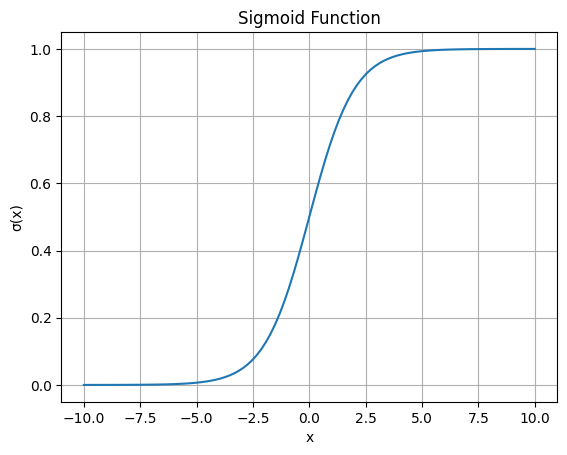

In [1]:
### Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

### Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Plot the sigmoid function
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("σ(x)")
plt.grid(True)
plt.show()

## Usage of the Sigmoid Function
### In Machine Learning Models
The sigmoid function is commonly used as an activation function in neural networks. It introduces non-linearity into the model, allowing it to learn complex patterns.

### Activation Function in Neural Networks
In the context of a neural network, the sigmoid function can be used as the activation function for a neuron. The output of the neuron is:

$$
\text{output} = \sigma(w \cdot x + b)
$$

where $w$ are the weights, $x$ is the input, and $b$ is the bias.

# Application of the Sigmoid Function as Logistic Function
## Logistic Regression
 Logistic regression is a statistical model that uses the sigmoid function to predict the probability of a binary outcome. The model is defined as:

$$
 P(y=1|x) = \sigma(w \cdot x + b)
$$

where $P(y=1|x)$ is the probability that the outcome $y$ is 1 given the input $x$.

## Example in Logistic Regression
Let's create a simple example of logistic regression using the sigmoid function.


In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of logistic regression model: {accuracy * 100:.2f}%")

Accuracy of logistic regression model: 88.00%


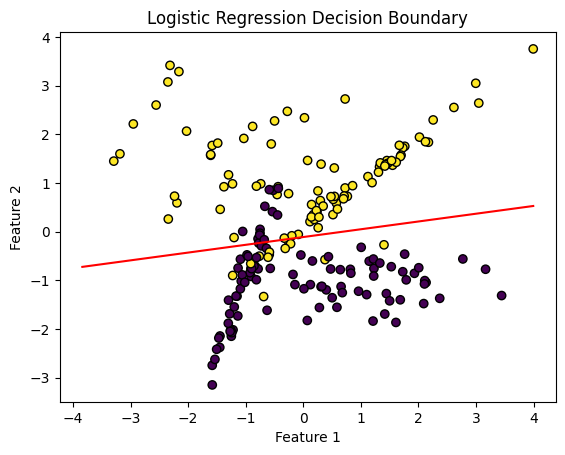

In [3]:
### Plotting decision boundary
coef = model.coef_[0]
intercept = model.intercept_

# Plot the decision boundary
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(coef[0] * x_values + intercept) / coef[1]

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k')
plt.plot(x_values, y_values, color='red')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Explanation of the decision boundary
- The decision boundary represents the line where the logistic regression model predicts a 50% probability of belonging to either class.
- For binary classification, logistic regression uses the ***sigmoid function*** to map predictions to probabilities between 0 and 1. The decision boundary is where the predicted probability is exactly 0.5.
- Data points are colored based on their true labels (yellow for one class and purple for the other).
- Points above or below the decision boundary can belong to either class due to overlap in the feature space.
- The logistic regression model provides the best linear separation but may not perfectly separate the classes if they overlap.
- Points that are misclassified (i.e., points that are colored based on their true labels but fall on the wrong side of the decision boundary according to the model) indicate the overlap or noise in the dataset.
- The features plotted on the axes range from negative to positive values, with zero included. This is normal for standardized or normalized data.

Great! The logistic regression model we have trained has an accuracy of 88%, which is quite good. Let's break down the next steps and further analysis you can include in the notebook:

## Additional Analysis and Explanation:
### **Confusion Matrix:**

This will give you a better understanding of how well your model is performing by showing the counts of true positive, true negative, false positive, and false negative predictions.

### **ROC Curve and AUC:**

Plotting the Receiver Operating Characteristic (ROC) curve and calculating the Area Under the Curve (AUC) will help you evaluate the model's performance more comprehensively.

### **Detailed Explanation of the Decision Boundary:**

Explain what the decision boundary represents and how it separates the data points based on the logistic regression model.

Accuracy of logistic regression model: 88.00%


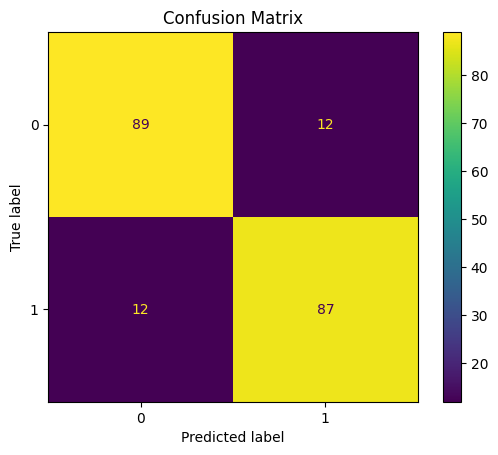

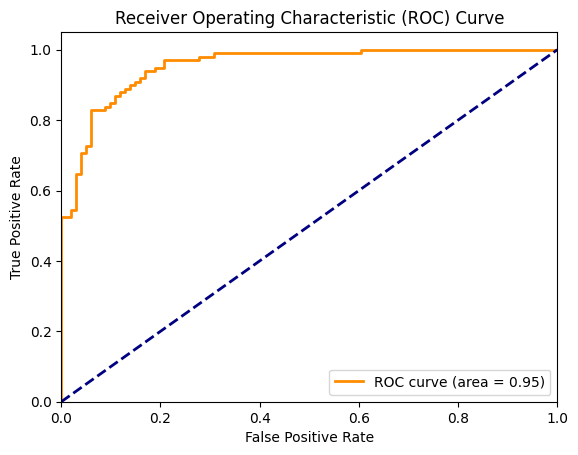

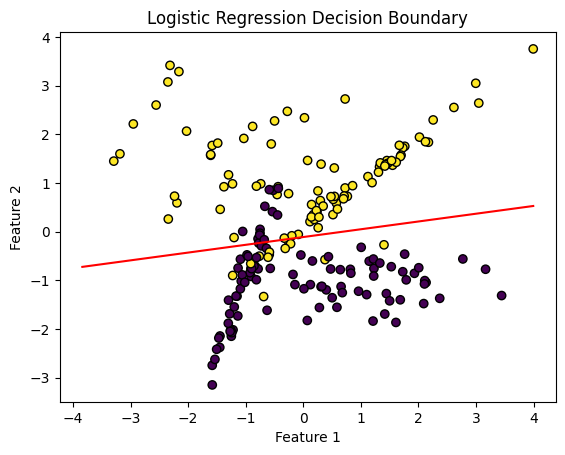

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of logistic regression model: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plotting decision boundary
coef = model.coef_[0]
intercept = model.intercept_

# Plot the decision boundary
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_values = -(coef[0] * x_values + intercept) / coef[1]

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k')
plt.plot(x_values, y_values, color='red')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()